\newpage

1

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets
ckd = pd.concat([chronic_kidney_disease.data.features ,chronic_kidney_disease.data.targets],axis=1)

print(chronic_kidney_disease.variables) 

     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                   so

In [2]:
ckd.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


From the dataset we've been given, our main task is to determine whether someone has chronic kidney disease (CKD) or not. The dataset includes various measurements and test results which might help us identify whether a patient has CKD.

2

To prepare the data for analysis

* categorical variables should be translated into numerical variables. LableEncoder is used.
* Records with missing values is removed

In [3]:
from sklearn.preprocessing import LabelEncoder

# remove NaN values
ckd_transform = ckd.dropna()

# Applying label encoding to categorical variables
label_encoders = {}
categorical_col = list(ckd_transform.select_dtypes(include=['object']).columns)
le = LabelEncoder()
for col in categorical_col:
    if col == 'class':
        ckd_transform[col] = ckd_transform[col].apply(lambda x: 0 if 'not' in x else 1)
    else:
        ckd_transform[col] = le.fit_transform(ckd_transform[col].astype(str))

In [4]:
ckd_transform.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,1,0,1,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32.0,4500.0,3.8,1,1,0,1,1,0,1
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16.0,11000.0,2.6,1,1,1,1,1,0,1
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,24.0,9200.0,3.2,1,1,1,1,1,1,1
22,48.0,80.0,1.025,4.0,0.0,1,0,0,0,95.0,...,32.0,6900.0,3.4,1,0,0,0,0,1,1
27,69.0,70.0,1.010,3.0,4.0,1,0,0,0,264.0,...,37.0,9600.0,4.1,1,1,1,0,1,0,1
48,73.0,70.0,1.005,0.0,0.0,1,1,0,0,70.0,...,29.0,18900.0,3.5,1,1,0,0,1,0,1
58,73.0,80.0,1.020,2.0,0.0,0,0,0,0,253.0,...,33.0,7200.0,4.3,1,1,1,0,0,0,1
71,46.0,60.0,1.010,1.0,0.0,1,1,0,0,163.0,...,28.0,14600.0,3.2,1,1,0,0,0,0,1


3

In [5]:
print(ckd.shape)

(400, 25)


In [6]:
ckd.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [7]:
ckd.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391.0,NaN,NaN,NaN,51.483376,17.169714,2.0,42.0,55.0,64.5,90.0
bp,388.0,NaN,NaN,NaN,76.469072,13.683637,50.0,70.0,80.0,80.0,180.0
sg,353.0,NaN,NaN,NaN,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,NaN,NaN,NaN,1.016949,1.352679,0.0,0.0,0.0,2.0,5.0
su,351.0,NaN,NaN,NaN,0.450142,1.099191,0.0,0.0,0.0,0.0,5.0
rbc,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pc,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcc,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ba,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bgr,356.0,NaN,NaN,NaN,148.036517,79.281714,22.0,99.0,121.0,163.0,490.0


* Observation Count and Variables: The dataset contains 158 rows and 25 columns
* There are missing values (NaN) in many columns. For example, several key variables such as sg (specific gravity), al (albumin), and su (sugar) showed substantial missing data in observations. This is critical because they are important for diagnosing kidney diseases.
* Data Types: Most variables related to medical measurements like blood pressure (bp), glucose levels (bgr), and others are floating point numbers. Variables like rbc (red blood cells) and pc (pus cell) are categorical, initially with text values which we converted to numerical codes.

4

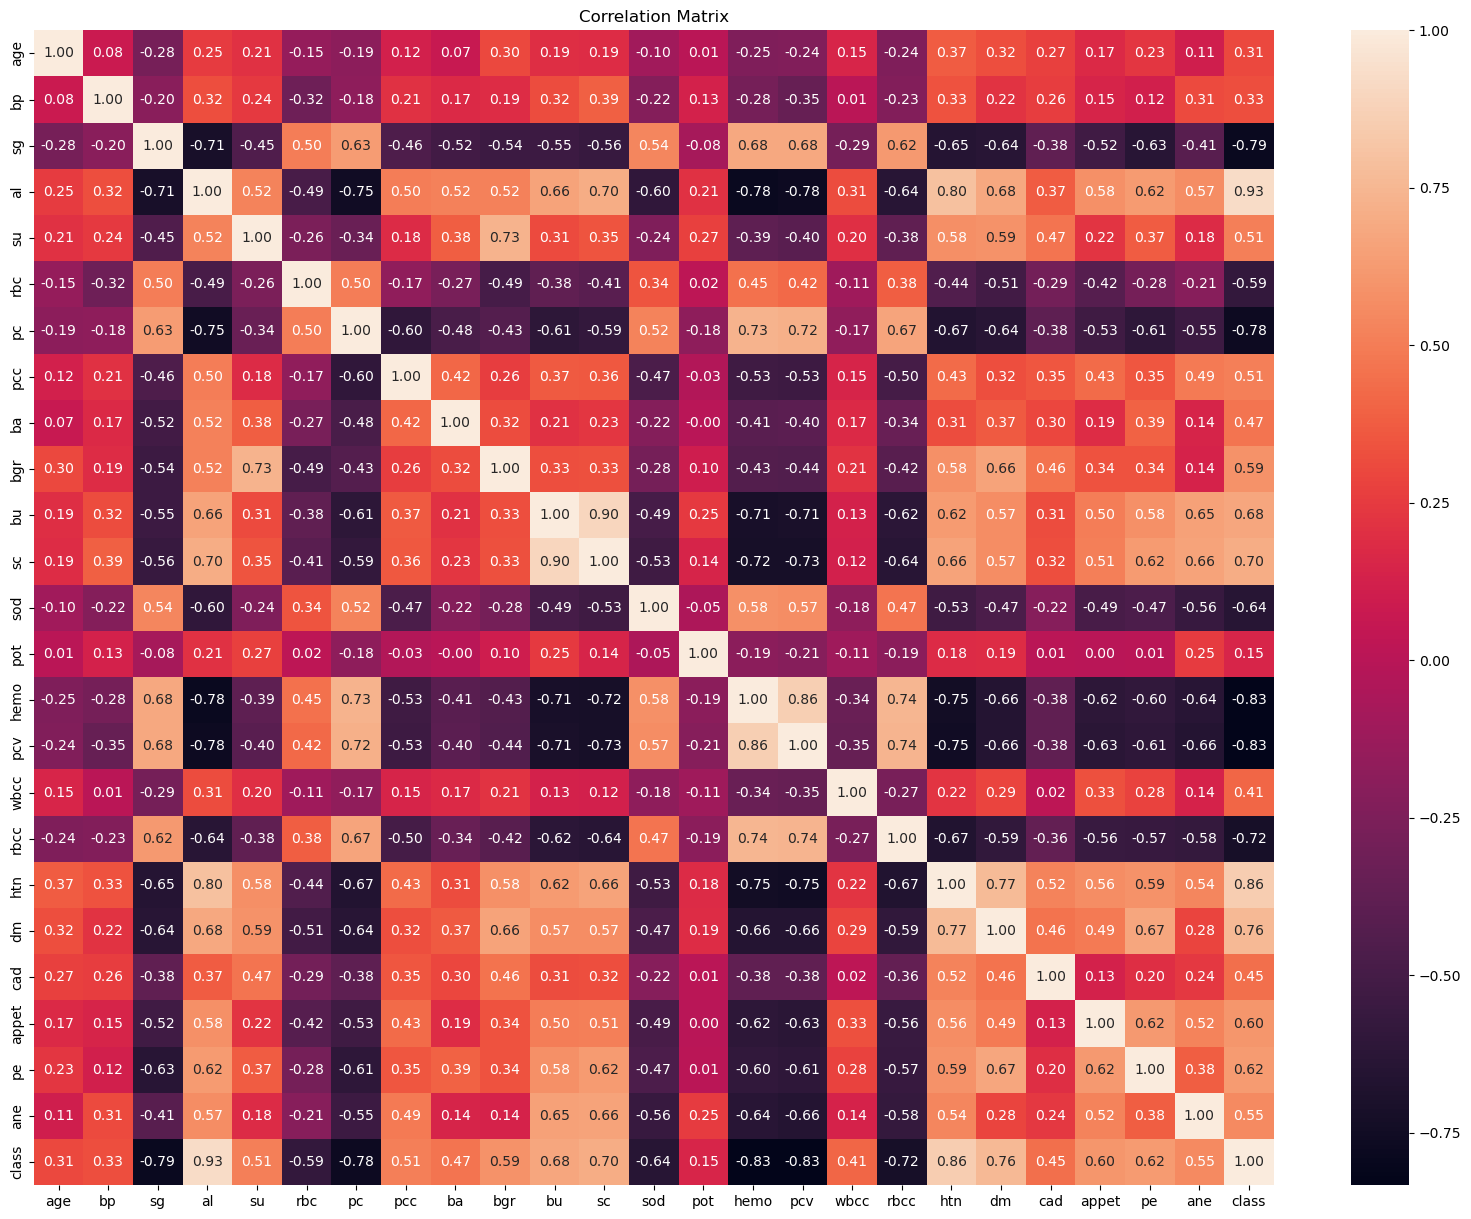

In [8]:
correlation_matrix = ckd_transform.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Answer: 

Hemoglobin and Packed Cell Volume (PCV): There is a very strong positive correlation between 'hemo' (hemoglobin) and 'pcv' (packed cell volume). Since both are indicators of the blood's ability to carry oxygen, they typically increase or decrease together.

Red Blood Cell Count (RBCC) and Hemoglobin (Hemo): A strong positive correlation exists between 'rbcc' and 'hemo'. These measures are linked to the blood's oxygen-carrying capacity, and typically, a lower hemoglobin level corresponds with a reduced red blood cell count.

Albumin (Al) and Blood Urea (Bu): A positive correlation is observed between these variables, suggesting that higher albumin levels in the urine, which may indicate reduced kidney function, are associated with increased blood urea levels due to the kidney's diminished ability to filter urea.

5

We should remove all the records that has missing values, instad of using imputed values, for the following reasons:

* Imputation introduces estimated values based on assumptions or patterns observed in other data. In health contexts, where every variable can be crucial and highly individual-specific, these estimates might not accurately represent the true state or condition of a patient. This could lead to incorrect conclusions or treatment decisions.

* Imputation methods themselves may introduce bias, particularly if the missing value is not random but related to certain unseen factors. If the method or the data used for imputation does not account for these factors accurately, it can skew the model’s outputs.

* By removing incomplete records, it ensures that the model only learns from the most reliable, fully observed datasets. This is particularly important in clinical trials or scenarios where data quality is paramount for accurate predictions.

6

We should keep the outlier, because:

* Outliers might signify rare diseases or unique complications that are not common in the general population. Removing these outliers could prevent the model from learning how to identify and treat these rare conditions.

* A predictive model trained on a dataset that includes outliers might develop a more robust understanding of the full spectrum of possible medical scenarios. 

7

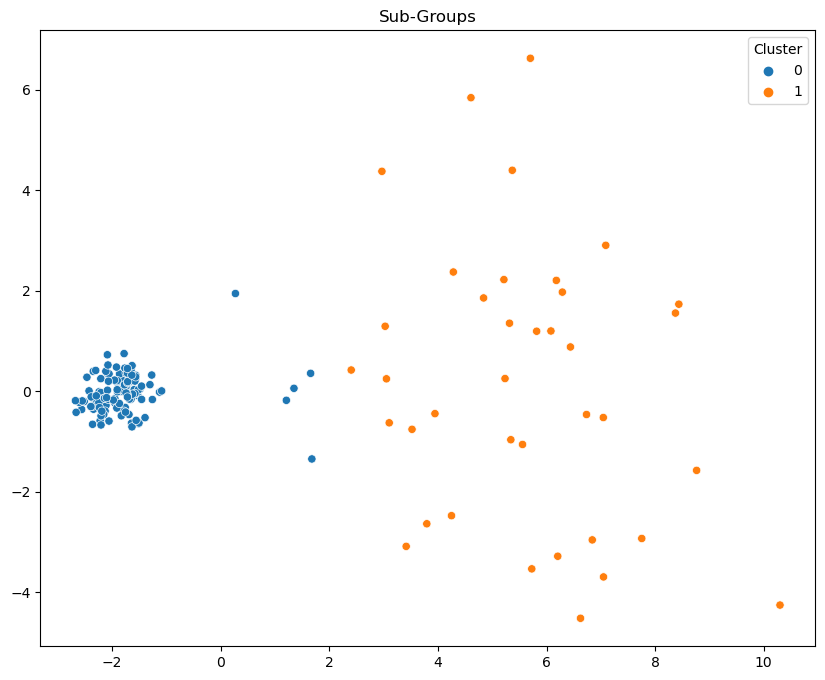

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = ckd_transform.drop(columns='class')
y = ckd_transform['class']
norm_transformer = StandardScaler()
X_normalized = norm_transformer.fit_transform(X)

# Configure and apply K-Means clustering
cluster_model = KMeans(n_clusters=2, random_state=1)
X_clusters = cluster_model.fit_predict(X_normalized)

# Setup and apply PCA
pca_transformer = PCA(n_components=2)
pca_results = pca_transformer.fit_transform(X_normalized)

# Plot the clustered data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=X_clusters)
plt.title('Sub-Groups')
plt.legend(title='Cluster')
plt.show()

Use the K-means and PCA, it can be seen that there are 1 clear subgroup of the data as labeled blue in the chart.

8

In [10]:
from sklearn.model_selection import train_test_split
X = ckd_transform.drop('class', axis=1)
y = ckd_transform['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

9

* Logistic Regression: Logistic regression provides coefficients that can be directly interpreted in terms of odds ratios for understanding the impact of each feature.

* Random Forest: Random forests can capture complex interactions between features without the need for feature engineering, as they are non-linear models.

10

* AUC (Area Under the Receiver Operating Characteristic Curve): Measures the entire area under the ROC curve, which evaluates the trade-off between true positive rate and false positive rate across all classification thresholds, offering a robust assessment especially beneficial for imbalanced datasets.
* Accuracy Socre: Calculates the ratio of correct predictions (true positives and true negatives) to total observations, providing an easy-to-understand metric that's most effective for balanced datasets but can be misleading if the data is imbalanced.

11

We can normalize the numerical predictors.

12

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score


# Initialize the two classifiers
log_reg = LogisticRegression()
random_forest = RandomForestClassifier(random_state=1)

# Train the logistic regression classifier
log_reg.fit(X_train, y_train)

# Train the random forest classifier
random_forest.fit(X_train, y_train)

# Make predictions with both classifiers
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Calculate F1 Scores
acc_score_lr = accuracy_score(y_test, y_pred_lr)
acc_score_rf = accuracy_score(y_test, y_pred_rf)

print(f'Logistic Regression ROC score: {roc_auc_lr:.4f}')
print(f'Random Forest ROC score: {roc_auc_rf:.4f}')
print(f'Logistic Regression accuracy score: {acc_score_lr:.4f}')
print(f'Random Forest accuracy score: {acc_score_rf:.4f}')

Logistic Regression ROC score: 0.9978
Random Forest ROC score: 1.0000
Logistic Regression accuracy score: 0.9792
Random Forest accuracy score: 1.0000


Compare the result, Random Forest is better than logestic regression. However, given the 100% accurate rate, it indicatest that random forest could be over-fitted.

In [16]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,9.5,29.0,12100.0,3.7,1,1,0,1,0,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,10.8,32.0,4500.0,3.8,1,1,0,1,1,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,5.6,16.0,11000.0,2.6,1,1,1,1,1,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,7.7,24.0,9200.0,3.2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [24]:
# normalize X
norm_transformer = StandardScaler()
numerical_cols = X.select_dtypes(include='float64').columns
X_normalized = X.copy()
X_normalized[numerical_cols] = norm_transformer.fit_transform(X[numerical_cols])
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=1220, stratify=y)

# redo logistic regression

# Initialize the two classifiers
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
# Calculate F1 Scores
acc_score_lr = accuracy_score(y_test, y_pred_lr)

print(f'Logistic Regression ROC score: {roc_auc_lr:.4f}')
print(f'Logistic Regression accuracy score: {acc_score_lr:.4f}')

Logistic Regression ROC score: 1.0000
Logistic Regression accuracy score: 0.9792


Normalization improved the logistic regression.

13

In [25]:
feature_importance = pd.DataFrame(log_reg.coef_[0], index=X_train.columns, columns=['Coefficient'])
print(feature_importance.sort_values(by='Coefficient', ascending=False))

       Coefficient
al        1.223405
wbcc      0.687336
bgr       0.510565
sc        0.440638
bu        0.400872
bp        0.308585
su        0.306532
htn       0.240473
age       0.232805
dm        0.125895
pcc       0.120178
cad       0.071545
pe        0.066590
ba        0.063082
appet     0.060222
ane       0.042827
pot       0.008539
pc       -0.237425
rbcc     -0.310068
rbc      -0.349323
sod      -0.466094
pcv      -0.520499
hemo     -0.587695
sg       -0.691706


From the coefficient parameters, we can observe that:
* The negative coefficient for sodium levels (sod) suggests that higher serum sodium concentrations are associated with a lower likelihood of having CKD. This could indicate that lower sodium levels, possibly reflecting issues with the kidneys' ability to balance minerals and electrolytes, are a marker of kidney dysfunction.

* Similarly, a negative coefficient for packed cell volume (pcv) implies that lower pcv values are linked with a higher risk of CKD. This relationship might be due to anemia, which is common in kidney disease because of decreased erythropoietin production by the kidneys.

* The positive coefficient for blood glucose random levels (bgr) indicates that higher glucose levels are a predictor of CKD. This aligns with the understanding that diabetes, a leading cause of CKD, is characterized by high blood sugar levels, which over time, can damage the kidneys.

14

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_resampled, y_resampled)
y_pred_rf = random_forest.predict(X_test)
acc_score_lr = accuracy_score(y_test, y_pred_lr)


15

* Question 1-8: Zhen Ye
* Question 9-16: Jianghan Sun

16

https://github.com/zhenye4003/STATS3DA-A6